Training FCGAN...
Starting Epoch 1/25...
Epoch 1/25 completed!
Starting Epoch 2/25...
Epoch 2/25 completed!
Starting Epoch 3/25...
Epoch 3/25 completed!
Starting Epoch 4/25...
Epoch 4/25 completed!
Starting Epoch 5/25...
Epoch 5/25 completed!
Starting Epoch 6/25...
Epoch 6/25 completed!
Starting Epoch 7/25...
Epoch 7/25 completed!
Starting Epoch 8/25...
Epoch 8/25 completed!
Starting Epoch 9/25...
Epoch 9/25 completed!
Starting Epoch 10/25...
Epoch 10/25 completed!
Starting Epoch 11/25...
Epoch 11/25 completed!
Starting Epoch 12/25...
Epoch 12/25 completed!
Starting Epoch 13/25...
Epoch 13/25 completed!
Starting Epoch 14/25...
Epoch 14/25 completed!
Starting Epoch 15/25...
Epoch 15/25 completed!
Starting Epoch 16/25...
Epoch 16/25 completed!
Starting Epoch 17/25...
Epoch 17/25 completed!
Starting Epoch 18/25...
Epoch 18/25 completed!
Starting Epoch 19/25...
Epoch 19/25 completed!
Starting Epoch 20/25...
Epoch 20/25 completed!
Starting Epoch 21/25...
Epoch 21/25 completed!
Starting Epoc

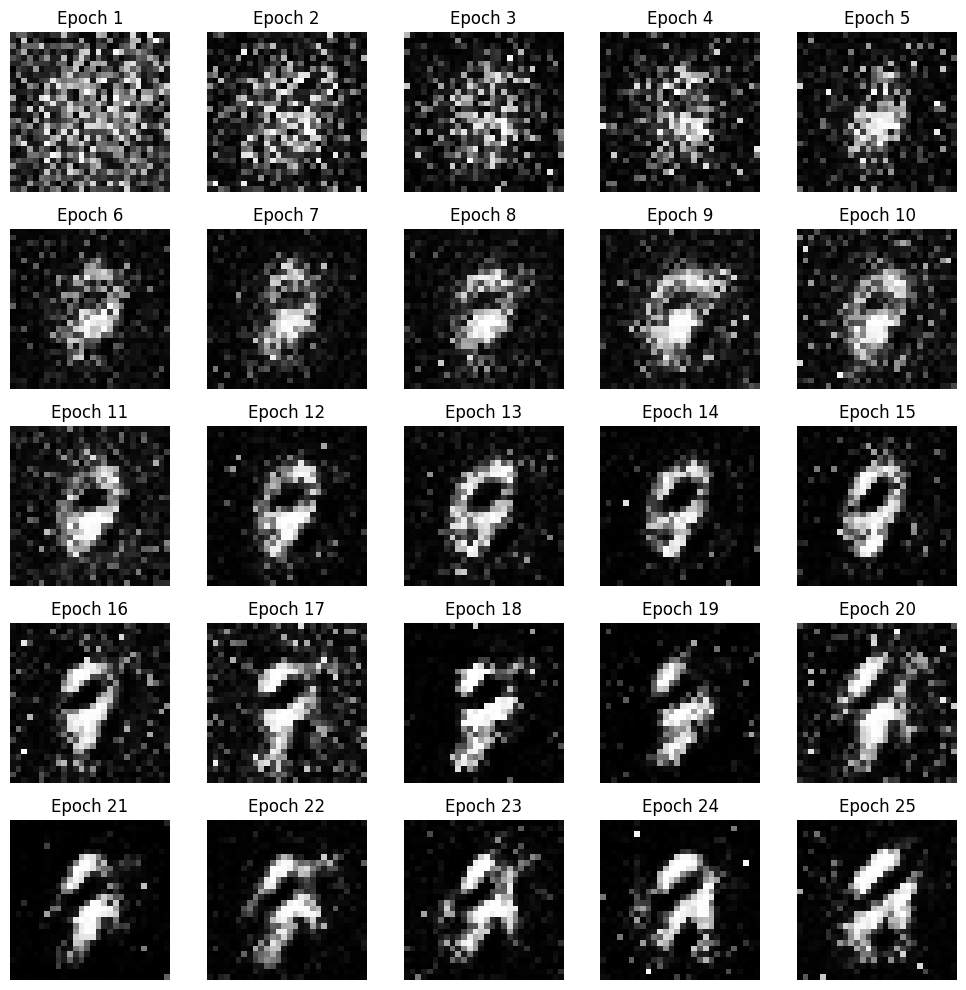

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


# Define FCGAN Generator
def make_fcgan_generator():
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(100,)),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(28 * 28 * 1, activation='tanh'),
        layers.Reshape((28, 28, 1))
    ])
    return model


# Define FCGAN Discriminator
def make_fcgan_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(1024, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1)
    ])
    return model


# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss


@tf.function
def train_step(images, generator, discriminator, generator_optimizer, discriminator_optimizer):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


def train(dataset, epochs, generator, discriminator, generator_optimizer, discriminator_optimizer, fixed_noise,
          image_list):
    for epoch in range(epochs):
        print(f"Starting Epoch {epoch + 1}/{epochs}...")
        for image_batch in dataset:
            train_step(image_batch, generator, discriminator, generator_optimizer, discriminator_optimizer)

        # Save generated images at the end of each epoch
        generated_images = generator(fixed_noise, training=False)
        image_list.append(generated_images)
        print(f"Epoch {epoch + 1}/{epochs} completed!")

# Visualization function for comparing images across epochs in a 5x5 grid
def visualize_images(image_list, model_name="FCGAN"):
    # Create a 5x5 grid for the images
    epochs = len(image_list)
    grid_size = 5  # 5x5 grid
    rows = grid_size
    cols = grid_size

    # If there are fewer than 25 epochs, adjust the grid size accordingly
    if epochs < 25:
        rows = (epochs + 4) // 5  # Adjust rows if fewer images are generated
        cols = 5

    # Create a figure with subplots for each image
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))  # Adjust the size if needed
    axes = axes.flatten()  # Flatten to easily iterate over all subplots

    # Loop through all generated images and plot them in the grid
    for i in range(epochs):
        axes[i].imshow((image_list[i][0, :, :, 0] + 1) / 2.0, cmap='gray')  # Normalize the image
        axes[i].axis('off')
        axes[i].set_title(f"Epoch {i + 1}")

    # If there are more subplots than images, hide the extra subplots
    for i in range(epochs, rows * cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Initialize FCGAN models and optimizers
fcgan_generator = make_fcgan_generator()
fcgan_discriminator = make_fcgan_discriminator()
fcgan_generator_optimizer = tf.keras.optimizers.Adam(1e-4)
fcgan_discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Fixed noise for consistency
fixed_noise = tf.random.normal([1, 100])  # Single noise vector for comparison

# Train FCGAN
fcgan_images = []
print("Training FCGAN...")
train(train_dataset, 25, fcgan_generator, fcgan_discriminator, fcgan_generator_optimizer, fcgan_discriminator_optimizer,
      fixed_noise, fcgan_images)

# After training is complete, call the function to visualize the images
visualize_images(fcgan_images)


Training DCGAN...
Starting Epoch 1/25...
Epoch 1/25 completed!
Starting Epoch 2/25...
Epoch 2/25 completed!
Starting Epoch 3/25...
Epoch 3/25 completed!
Starting Epoch 4/25...
Epoch 4/25 completed!
Starting Epoch 5/25...
Epoch 5/25 completed!
Starting Epoch 6/25...
Epoch 6/25 completed!
Starting Epoch 7/25...
Epoch 7/25 completed!
Starting Epoch 8/25...
Epoch 8/25 completed!
Starting Epoch 9/25...
Epoch 9/25 completed!
Starting Epoch 10/25...
Epoch 10/25 completed!
Starting Epoch 11/25...
Epoch 11/25 completed!
Starting Epoch 12/25...
Epoch 12/25 completed!
Starting Epoch 13/25...
Epoch 13/25 completed!
Starting Epoch 14/25...
Epoch 14/25 completed!
Starting Epoch 15/25...
Epoch 15/25 completed!
Starting Epoch 16/25...
Epoch 16/25 completed!
Starting Epoch 17/25...
Epoch 17/25 completed!
Starting Epoch 18/25...
Epoch 18/25 completed!
Starting Epoch 19/25...
Epoch 19/25 completed!
Starting Epoch 20/25...
Epoch 20/25 completed!
Starting Epoch 21/25...
Epoch 21/25 completed!
Starting Epoc

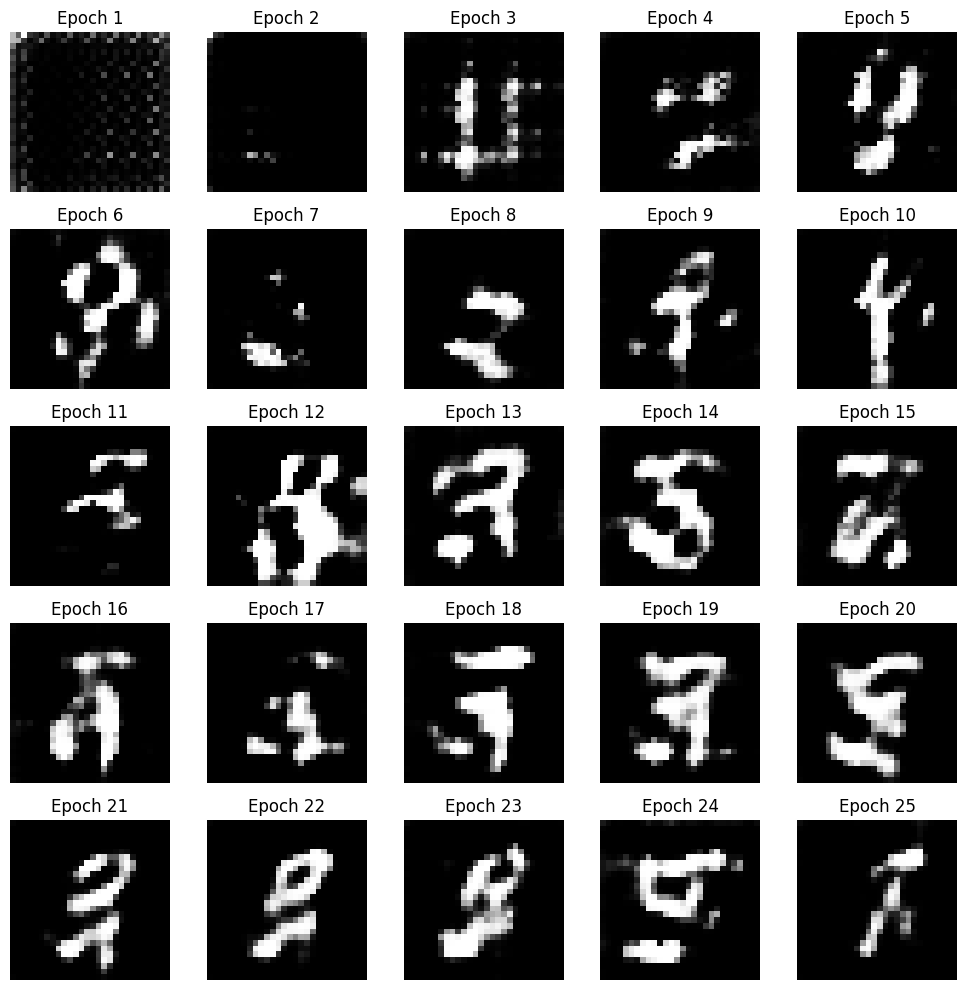

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Define DCGAN Generator
def make_dcgan_generator():
    model = tf.keras.Sequential([
        layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

# Define DCGAN Discriminator
def make_dcgan_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

@tf.function
def train_step(images, generator, discriminator, generator_optimizer, discriminator_optimizer):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def train(dataset, epochs, generator, discriminator, generator_optimizer, discriminator_optimizer, fixed_noise, image_list):
    for epoch in range(epochs):
        print(f"Starting Epoch {epoch + 1}/{epochs}...")
        for image_batch in dataset:
            train_step(image_batch, generator, discriminator, generator_optimizer, discriminator_optimizer)

        # Save generated images at the end of each epoch
        generated_images = generator(fixed_noise, training=False)
        image_list.append(generated_images)
        print(f"Epoch {epoch + 1}/{epochs} completed!")

# Visualization function for comparing images across epochs in a 5x5 grid
def visualize_images(image_list, model_name="DCGAN"):
    epochs = len(image_list)
    rows = 5  # Set the number of rows for the grid
    cols = 5  # Set the number of columns for the grid

    if epochs < 25:
        rows = (epochs + 4) // 5  # Adjusting rows if fewer images are generated

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))  # Adjust the grid size if needed

    for i in range(epochs):
        row = i // cols  # Determine row
        col = i % cols   # Determine column
        axes[row, col].imshow((image_list[i][0, :, :, 0] + 1) / 2.0, cmap='gray')  # Normalize the image
        axes[row, col].axis('off')
        axes[row, col].set_title(f"Epoch {i + 1}")

    # Hide axes for any extra empty cells
    for i in range(epochs, rows * cols):
        row = i // cols
        col = i % cols
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Initialize DCGAN models and optimizers
dcgan_generator = make_dcgan_generator()
dcgan_discriminator = make_dcgan_discriminator()
dcgan_generator_optimizer = tf.keras.optimizers.Adam(1e-4)
dcgan_discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Fixed noise for consistency
fixed_noise = tf.random.normal([1, 100])  # Single noise vector for comparison

# Train DCGAN
dcgan_images = []
print("Training DCGAN...")
train(train_dataset, 25, dcgan_generator, dcgan_discriminator, dcgan_generator_optimizer, dcgan_discriminator_optimizer, fixed_noise, dcgan_images)

# Visualizing DCGAN Results after training
if dcgan_images:
    visualize_images(dcgan_images, model_name="DCGAN")
else:
    print("DCGAN training failed to generate images.")

Visualizing side-by-side comparison...


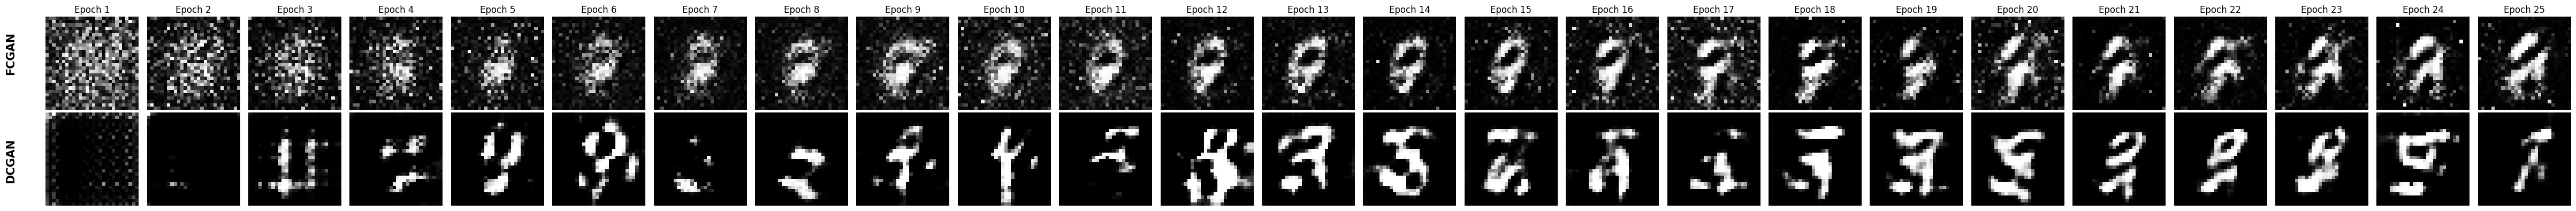

In [ ]:
# Side-by-side visualization with row labels
def visualize_side_by_side(fcgan_images, dcgan_images, epochs):
    fig, axes = plt.subplots(2, epochs, figsize=(epochs * 2, 4))

    for i in range(epochs):
        # FCGAN images
        axes[0, i].imshow((fcgan_images[i][0, :, :, 0] + 1) / 2.0, cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title(f"Epoch {i + 1}")

        # DCGAN images
        axes[1, i].imshow((dcgan_images[i][0, :, :, 0] + 1) / 2.0, cmap='gray')
        axes[1, i].axis('off')

    # Adding labels for rows
    fig.text(0.04, 0.75, "FCGAN", va='center', ha='center', rotation='vertical', fontsize=15, fontweight='bold')
    fig.text(0.04, 0.25, "DCGAN", va='center', ha='center', rotation='vertical', fontsize=15, fontweight='bold')

    plt.tight_layout(rect=[0.05, 0, 1, 1])  # Adjust layout to accommodate labels
    plt.show()


if fcgan_images and dcgan_images:
    print("Visualizing side-by-side comparison...")
    visualize_side_by_side(fcgan_images, dcgan_images, min(len(fcgan_images), len(dcgan_images)))
